In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [177]:
import warnings
warnings.filterwarnings("ignore")

In [178]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_12_Naive_bayes

08-08-2022  19:32    <DIR>          .
08-08-2022  19:32    <DIR>          ..
08-08-2022  17:57    <DIR>          .ipynb_checkpoints
08-08-2022  19:32           397,602 assignment12_Naive_Bayes.ipynb
14-07-2022  08:39               617 Problem_statement(salary_data).txt
14-07-2022  08:40         1,694,474 SalaryData_Test.csv
14-07-2022  08:40         3,393,618 SalaryData_Train.csv
               4 File(s)      5,486,311 bytes
               3 Dir(s)  131,101,831,168 bytes free


# Problem Statement

Prepare a classification model using Naive Bayes for salary data 

Data Description:

1. age --> age of a person
2. workclass --> A work class is a grouping of work 
3. education --> Education of an individuals	
4. maritalstatus --> Marital status of an individulas	
5. occupation --> occupation of an individuals
6. relationship --> 	
7. race --> Race of an Individual
8. sex --> Gender of an Individual
9. capitalgain --> profit received from the sale of an investment	
10. capitalloss	--> A decrease in the value of a capital asset
11. hoursperweek --> number of hours work per week	
12. native --> Native of an individual
13. Salary --> salary of an individual

In [179]:
# Reading the data
train=pd.read_csv("SalaryData_Train.csv")
test=pd.read_csv("SalaryData_Test.csv")

In [180]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [181]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [182]:
train.shape

(30161, 14)

In [183]:
test.shape

(15060, 14)

In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [185]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [186]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [187]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [188]:
train.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

The training data is highly imbalanced.

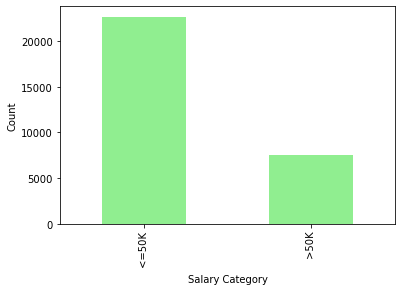

In [189]:
train.Salary.value_counts().plot(kind='bar',color='lightgreen')
plt.xlabel("Salary Category")
plt.ylabel("Count")
plt.show()

In [190]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [191]:
# Converting the Target into category

from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['salary']=label_encoder.fit_transform(train['Salary'])
test['salary']=label_encoder.fit_transform(test['Salary'])

In [192]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [193]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0


In [194]:
# Dropping the "Salary" column
train.drop(columns='Salary',axis=0,inplace=True)
test.drop(columns='Salary',axis=0,inplace=True)

In [195]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [196]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


# EDA

Crosstab plots for categorical features and Distribution/Box plot for continuos features.

<AxesSubplot:xlabel='salary', ylabel='age'>

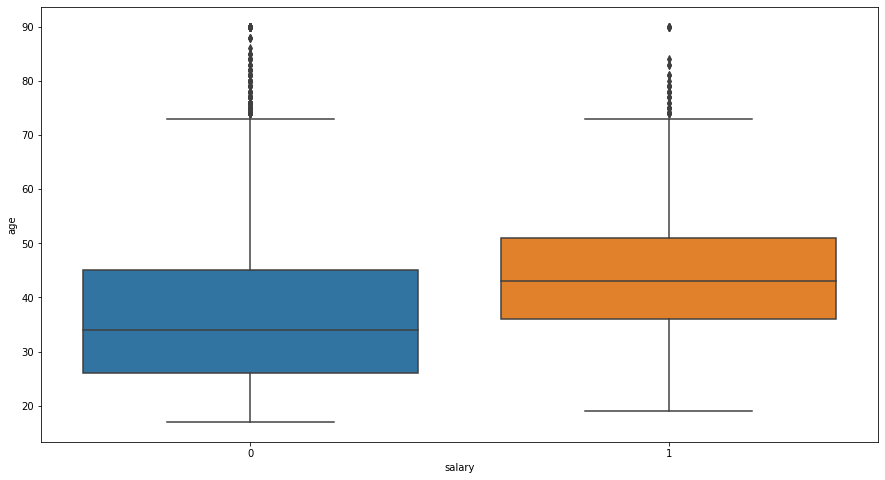

In [197]:
plt.figure(figsize=(15,8))
sns.boxplot(train['salary'],train['age'])

<AxesSubplot:xlabel='salary', ylabel='educationno'>

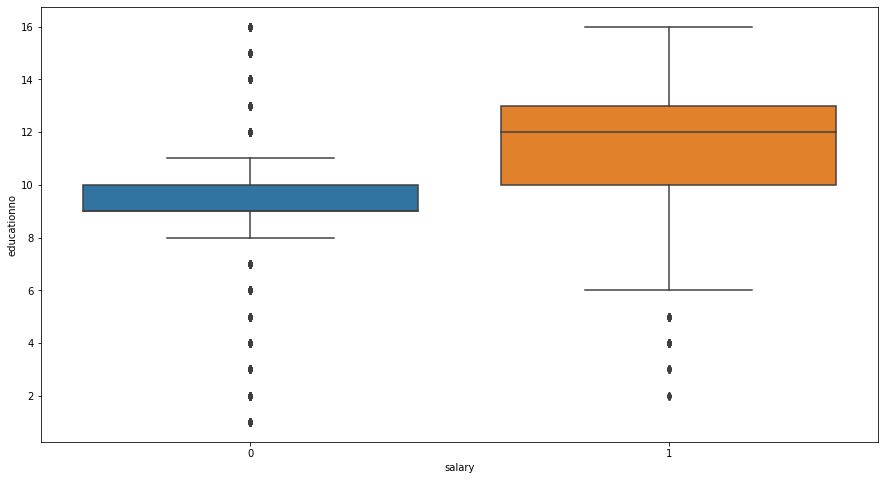

In [198]:
plt.figure(figsize=(15,8))
sns.boxplot(train['salary'],train['educationno'])

<AxesSubplot:xlabel='salary', ylabel='capitalgain'>

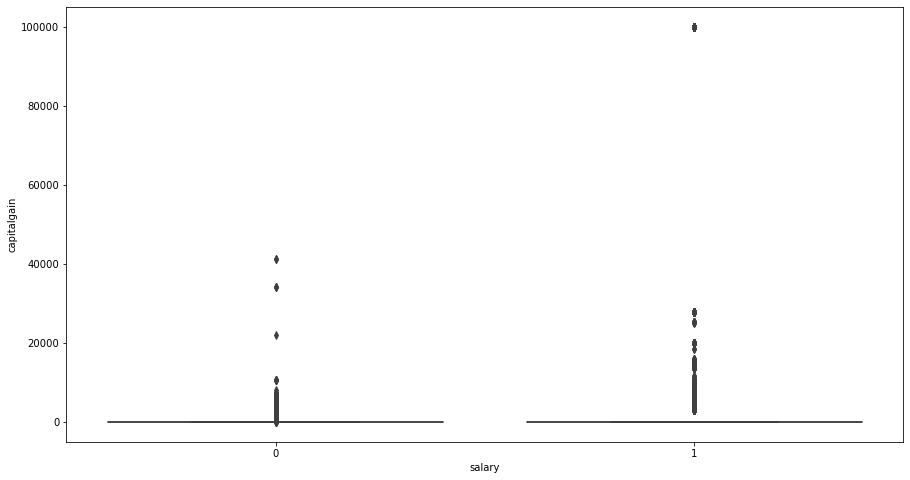

In [199]:
plt.figure(figsize=(15,8))
sns.boxplot(train['salary'],train['capitalgain'])

<AxesSubplot:xlabel='salary', ylabel='capitalloss'>

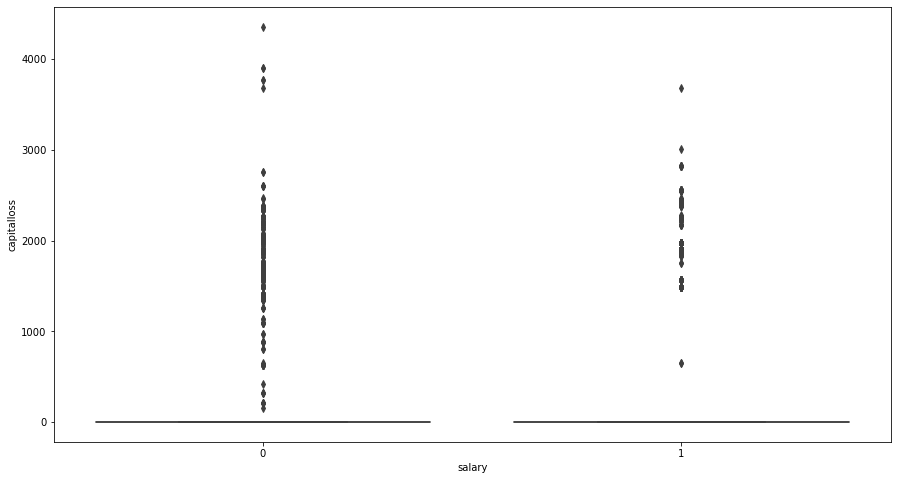

In [200]:
plt.figure(figsize=(15,8))
sns.boxplot(train['salary'],train['capitalloss'])

<AxesSubplot:xlabel='salary', ylabel='hoursperweek'>

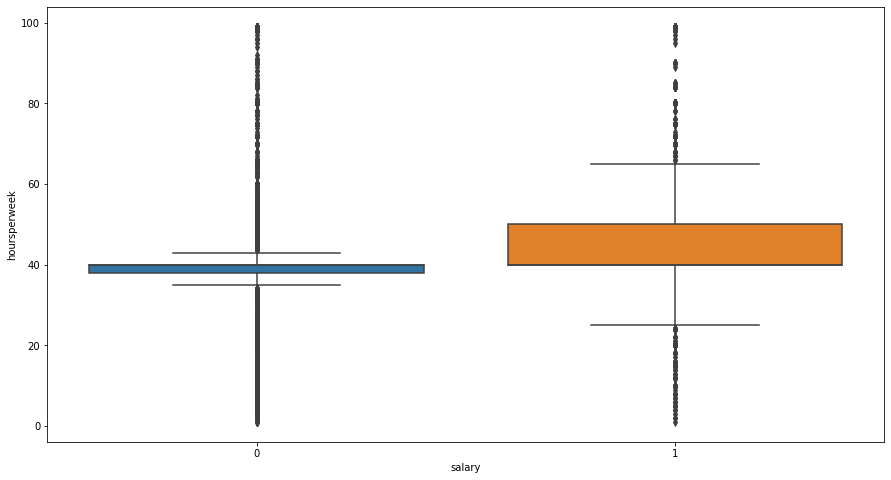

In [201]:
plt.figure(figsize=(15,8))
sns.boxplot(train['salary'],train['hoursperweek'])

<Figure size 720x432 with 0 Axes>

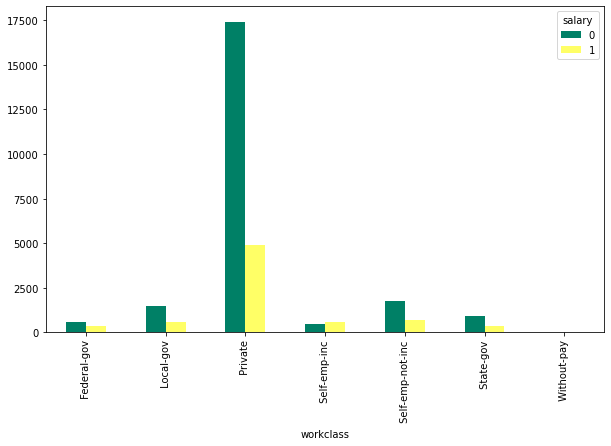

In [202]:
plt.figure(figsize=(10,6))
pd.crosstab(train['workclass'],train['salary']).plot(kind='bar',cmap="summer",figsize=(10,6))
plt.show()

<Figure size 720x432 with 0 Axes>

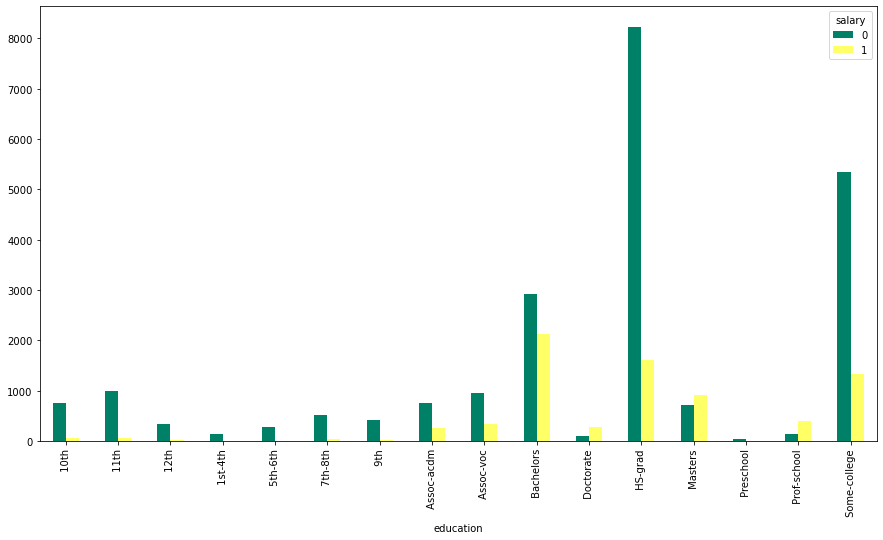

In [203]:
plt.figure(figsize=(10,6))
pd.crosstab(train['education'],train['salary']).plot(kind='bar',cmap="summer",figsize=(15,8))
plt.show()

<Figure size 720x432 with 0 Axes>

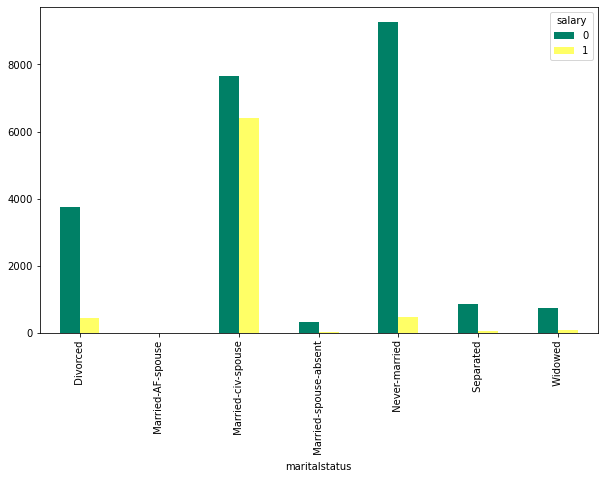

In [204]:
plt.figure(figsize=(10,6))
pd.crosstab(train['maritalstatus'],train['salary']).plot(kind='bar',cmap="summer",figsize=(10,6))
plt.show()

<Figure size 720x432 with 0 Axes>

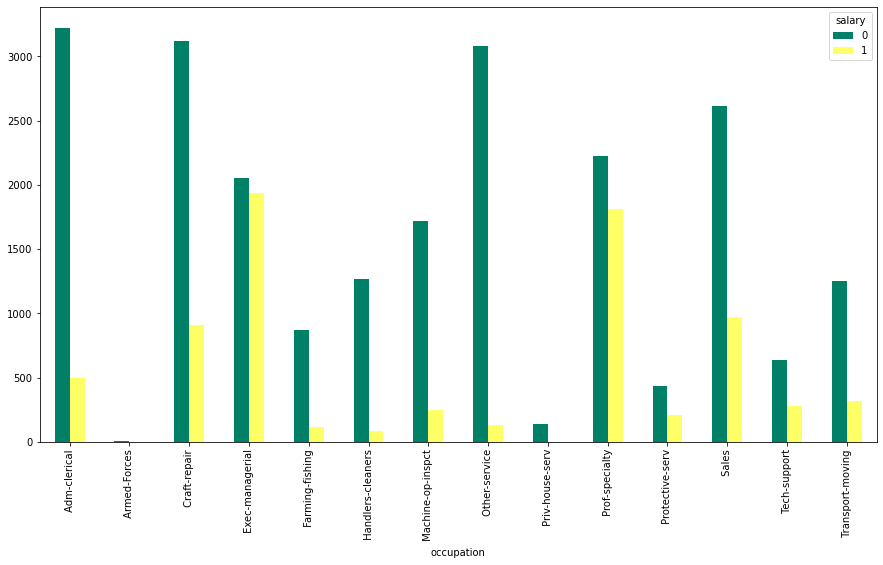

In [205]:
plt.figure(figsize=(10,6))
pd.crosstab(train['occupation'],train['salary']).plot(kind='bar',cmap="summer",figsize=(15,8))
plt.show()

<Figure size 720x432 with 0 Axes>

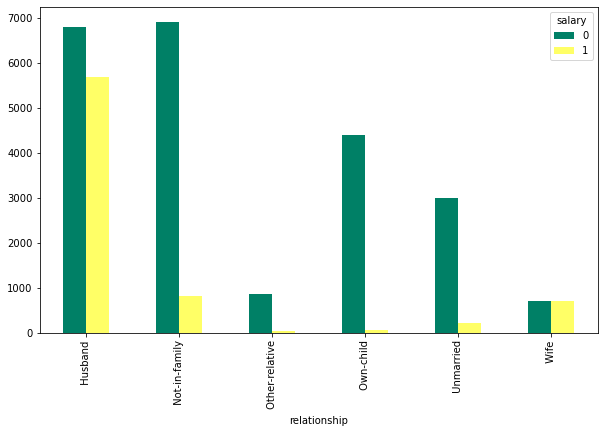

In [206]:
plt.figure(figsize=(10,6))
pd.crosstab(train['relationship'],train['salary']).plot(kind='bar',cmap="summer",figsize=(10,6))
plt.show()

<Figure size 720x432 with 0 Axes>

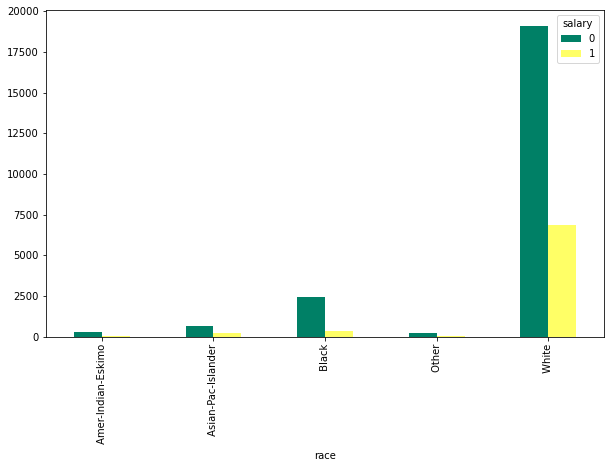

In [207]:
plt.figure(figsize=(10,6))
pd.crosstab(train['race'],train['salary']).plot(kind='bar',cmap="summer",figsize=(10,6))
plt.show()

<Figure size 720x432 with 0 Axes>

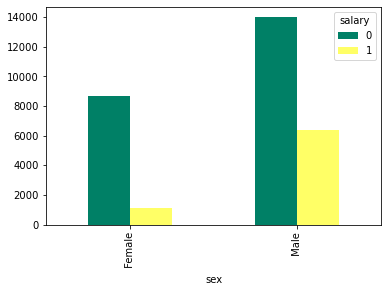

In [208]:
plt.figure(figsize=(10,6))
pd.crosstab(train['sex'],train['salary']).plot(kind='bar',cmap="summer")
plt.show()

<Figure size 720x432 with 0 Axes>

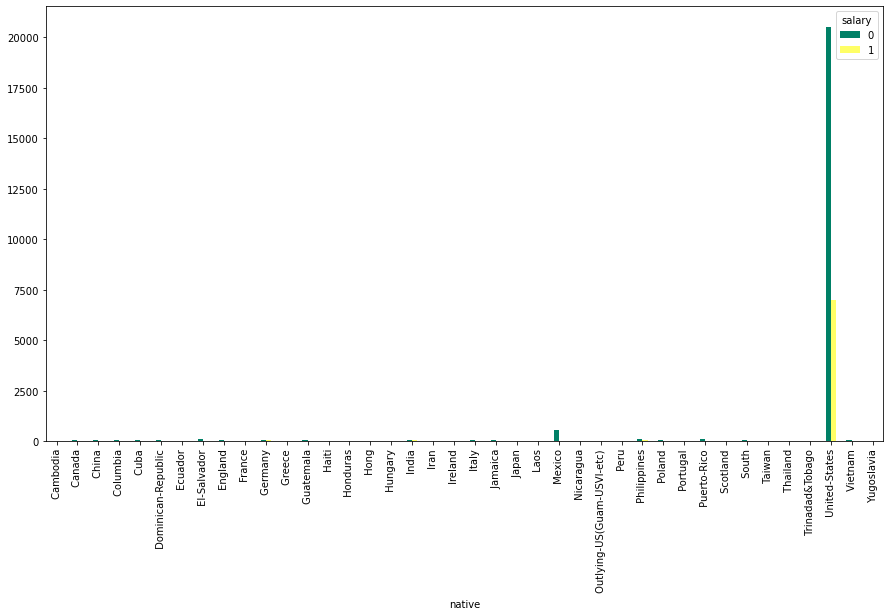

In [209]:
plt.figure(figsize=(10,6))
pd.crosstab(train['native'],train['salary']).plot(kind='bar',cmap="summer",figsize=(15,8))
plt.show()

We can see that "native" is not really useful for classifying the data, hence we can drop it.

In [210]:
# Dropping the "native" column 
train.drop(columns='native',inplace=True)
test.drop(columns='native',inplace=True)

In [211]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0


In [212]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,0


In [213]:
# Get Dummies
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   30161 non-null  int64
 1   educationno                           30161 non-null  int64
 2   capitalgain                           30161 non-null  int64
 3   capitalloss                           30161 non-null  int64
 4   hoursperweek                          30161 non-null  int64
 5   salary                                30161 non-null  int32
 6   workclass_ Federal-gov                30161 non-null  uint8
 7   workclass_ Local-gov                  30161 non-null  uint8
 8   workclass_ Private                    30161 non-null  uint8
 9   workclass_ Self-emp-inc               30161 non-null  uint8
 10  workclass_ Self-emp-not-inc           30161 non-null  uint8
 11  workclass_ State-gov                  301

In [215]:
# Dropping the "salary" column and saving the features to some other variable
temp1=train.drop(columns='salary')
temp2=test.drop(columns='salary')

In [216]:
temp1    # Contains all training data features

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,0,0,40,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
30158,58,9,0,0,40,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
30159,22,9,0,0,20,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [217]:
temp2     # Contains all testing data features

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,7,0,0,40,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
15058,44,13,5455,0,40,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [218]:
# Seperating the train and test data into X and Y

X_train=temp1.iloc[:,:]
Y_train=train.iloc[:,5]

X_test=temp2.iloc[:,:]
Y_test=test.iloc[:,5]

In [219]:
X_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,0,0,40,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
30158,58,9,0,0,40,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
30159,22,9,0,0,20,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [220]:
X_test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,7,0,0,40,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
15058,44,13,5455,0,40,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [221]:
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: salary, Length: 30161, dtype: int32

In [222]:
Y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: salary, Length: 15060, dtype: int32

In [223]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(30161, 62) (30161,) (15060, 62) (15060,)


# Model Creation

Since here the features are mixed (categorical as well as continuos) we can use GaussianNB.

In [224]:
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [225]:
# Making predictions
Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)

In [226]:
# Accuracy for training data
accuracy_score(Y_train,Y_train_pred)

0.8083617917177812

In [227]:
# Accuracy for testing data
accuracy_score(Y_test,Y_test_pred)

0.8073705179282868

In [228]:
# Confusion matrix for training data
confusion_matrix(Y_train,Y_train_pred)

array([[18394,  4259],
       [ 1521,  5987]], dtype=int64)

<AxesSubplot:>

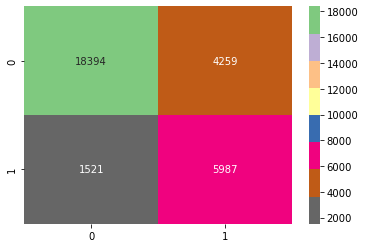

In [229]:
sns.heatmap(confusion_matrix(Y_train,Y_train_pred),annot=True,fmt='3.0f',cmap='Accent_r')

In [230]:
# Confusion matrix for testing data
confusion_matrix(Y_test,Y_test_pred)

array([[9178, 2182],
       [ 719, 2981]], dtype=int64)

<AxesSubplot:>

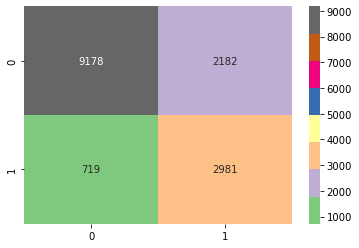

In [231]:
sns.heatmap(confusion_matrix(Y_test,Y_test_pred),annot=True,fmt='3.0f',cmap='Accent')

In [232]:
# Classification Report for testing data
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86     11360
           1       0.58      0.81      0.67      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.81      0.77     15060
weighted avg       0.84      0.81      0.82     15060



In [233]:
# Classification Report for training data
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     22653
           1       0.58      0.80      0.67      7508

    accuracy                           0.81     30161
   macro avg       0.75      0.80      0.77     30161
weighted avg       0.84      0.81      0.82     30161



The precision, recall and f1-score all looks great. Hence the Imbalanced data is not affecting the predictions.

# The final accuracy of testing data is 81%